In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy  as np

In [2]:
img_loc = "standard_test_images/cameraman.tif"

In [3]:
def getNpArray(image_path) -> np.ndarray:
    return np.array(Image.open(image_path))

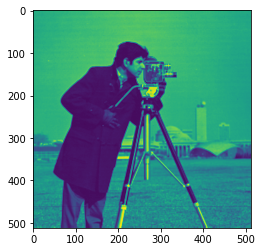

In [4]:
cameraman_img = getNpArray(img_loc)
plt.imshow(cameraman_img)

### Scale the image by the factor of 2

In [5]:
def nearestNeighborInterpolation(np_image: np.ndarray, new_size: int) -> np.ndarray:
    """
    Nearest neighbor interpolation.
    :param np_image: numpy array of image
    :param new_size: new size of image
    :return: nearest neighbor interpolated image
    """
    new_image = np.zeros((new_size, new_size), dtype=np.uint8)
    for i in range(new_size):
        for j in range(new_size):
            new_image[i][j] = np_image[int(i/new_size*np_image.shape[0])][int(j/new_size*np_image.shape[1])]
    return new_image

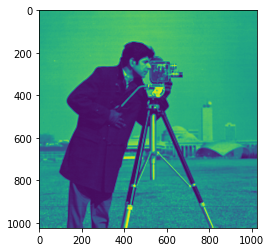

In [6]:
cameraman_2x = nearestNeighborInterpolation(cameraman_img, cameraman_img.shape[0]*2)
plt.imshow(cameraman_2x)

### Rotate the Image

In [7]:
def rotateImageBy90(np_image: np.ndarray) -> np.ndarray:
    """
    Rotate an image by 90 degrees.
    :param np_image: numpy array of image
    :return: rotated image
    """
    rotated_image = np.zeros((np_image.shape[1], np_image.shape[0]), dtype=np.uint8)
    for i in range(np_image.shape[1]):
        for j in range(np_image.shape[0]):
            rotated_image[i][j] = np_image[j][np_image.shape[1]-1-i]
    return rotated_image

def rotateImage(np_image: np.ndarray, angle: int) -> np.ndarray:
    """
    Rotate an image by a given angle.
    :param np_image: numpy array of image
    :param angle: angle to rotate by multiples of 90 degrees
    :return: rotated image
    """
    stage = angle//90
    new_image = np_image.copy()
    while stage > 0:
        new_image = rotateImageBy90(new_image)
        stage -= 1
        
    return new_image 

### Rotate by 90 degrees

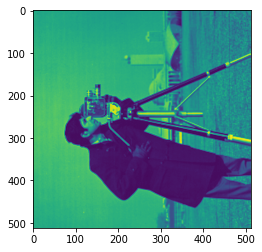

In [8]:
cameraman_90 = rotateImage(cameraman_img, 90)
plt.imshow(cameraman_90)

### Rotate by 180 degrees

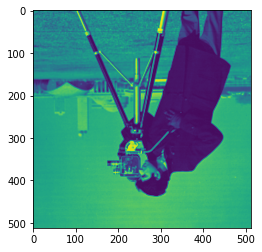

In [9]:
cameraman_180 = rotateImage(cameraman_img, 180)
plt.imshow(cameraman_180)

### Horizontal shear 

In [10]:
def shearImage(np_image: np.ndarray) -> np.ndarray:
    """
    Shear an image.
    :param np_image: numpy array of image
    :return: sheared image
    """
    fact = 10
    new_image = np.zeros((np_image.shape[0], np_image.shape[1]), dtype=np.uint8)
    for i in range(np_image.shape[0]):
        for j in range(np_image.shape[1]):
            nj = j+int(i*fact/45)
            if nj < np_image.shape[0]:
                new_image[i][j] = np_image[i][nj]
    return new_image

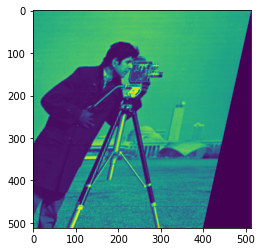

In [12]:
cameraman_shear = shearImage(cameraman_img)
plt.imshow(cameraman_shear)